# Page views time series

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates = ["date"], index_col = "date")
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [3]:
# Clean data
df = df[(df["value"] >= df["value"].quantile(0.025)) & (df["value"] <= df["value"].quantile(0.975))]

In [4]:
def draw_line_plot():
    # Draw line plot
    fig, lpt = plt.subplots(figsize = (15,5))
    lpt.plot(df.index, df['value'], color='red', linewidth=1)
    lpt.set_title("FrecodeCamp pageviews")
    lpt.set_xlabel("Date")
    lpt.set_ylabel("Page Views")

    plt.show()

    # Save image and return fig (don't change this part)
    #fig.savefig('line_plot.png')
    return fig

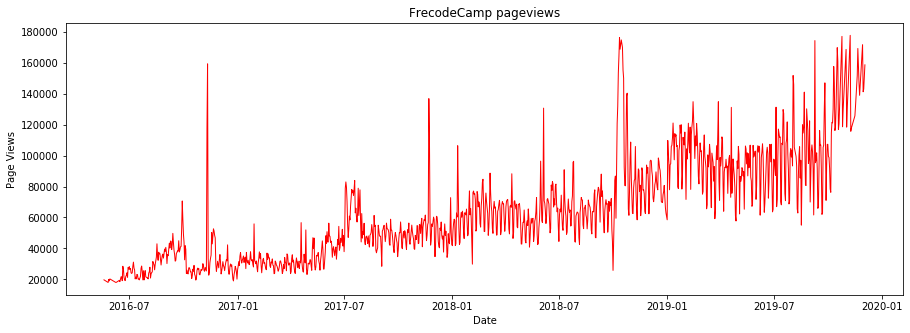

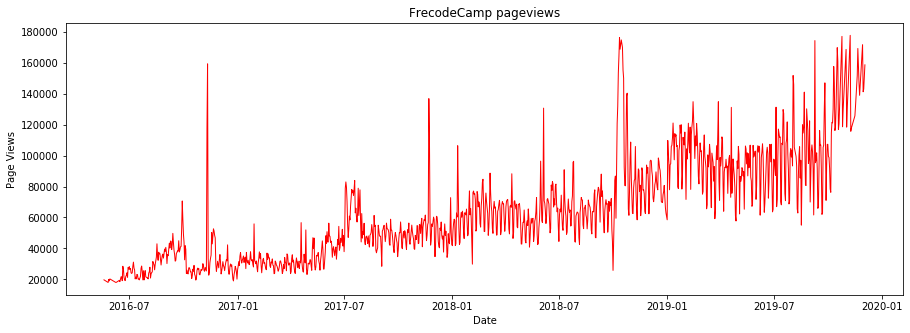

In [5]:
draw_line_plot()

In [42]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df["month"]= df.index.month
    df["year"] = df.index.year
    df_bar = df.groupby(["year", "month"])["value"].mean()
    df_bar = df_bar.unstack()
    # Draw bar plot
    fig = df_bar.plot(kind="bar", legend = True, figsize= (15, 10)).figure
    plt.legend(fontsize = 10, title = "Moths", labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
    # Save image and return fig (don't change this part)
    #fig.savefig('bar_plot.png')
    return fig

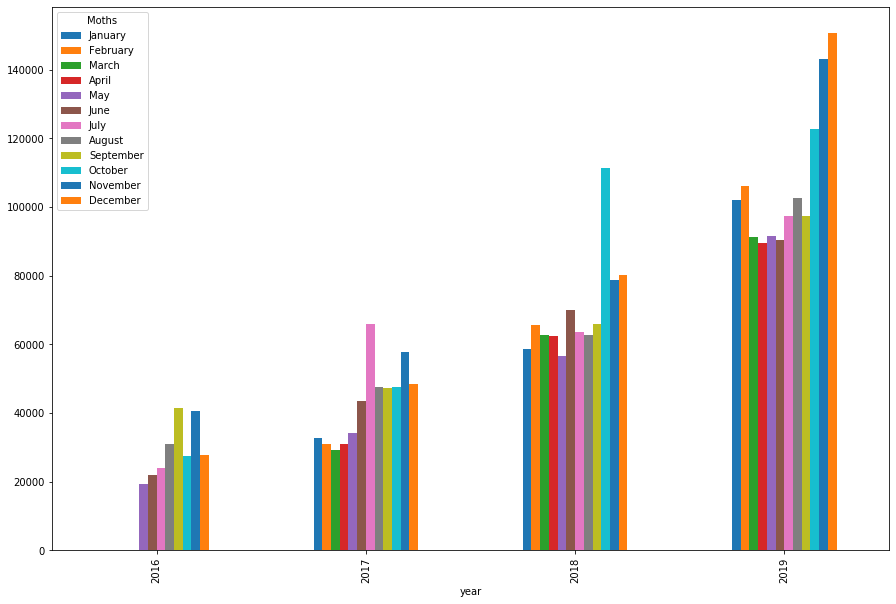

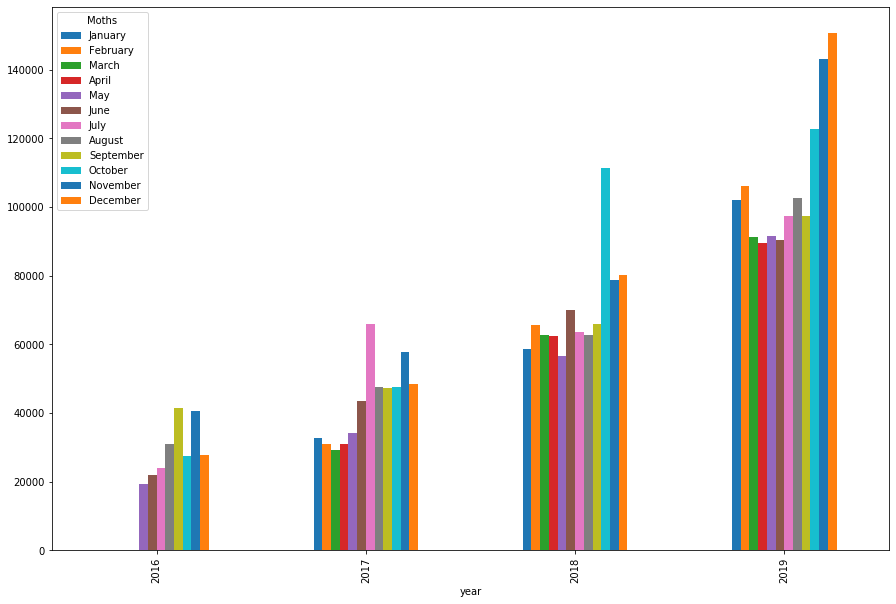

In [43]:
draw_bar_plot()

In [8]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]
    
    df_box['mont_num'] = df_box['date'].dt.month
    
    # Draw box plots (using Seaborn)
        
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize= (15, 10))
    axes[0] = sns.boxplot(x=df_box['year'], y=df_box['value'], ax = axes[0])
    axes[1] = sns.boxplot(x=df_box['month'], y=df_box['value'], ax = axes[1])
    
    axes[0].set_title('Year-wise page views')
    axes[0].set_xlabel('year')
    axes[0].set_ylabel('page views')

    axes[1].set_title('Moth-wise page views')
    axes[1].set_xlabel('month')
    axes[1].set_ylabel('page views')
    plt.show()

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

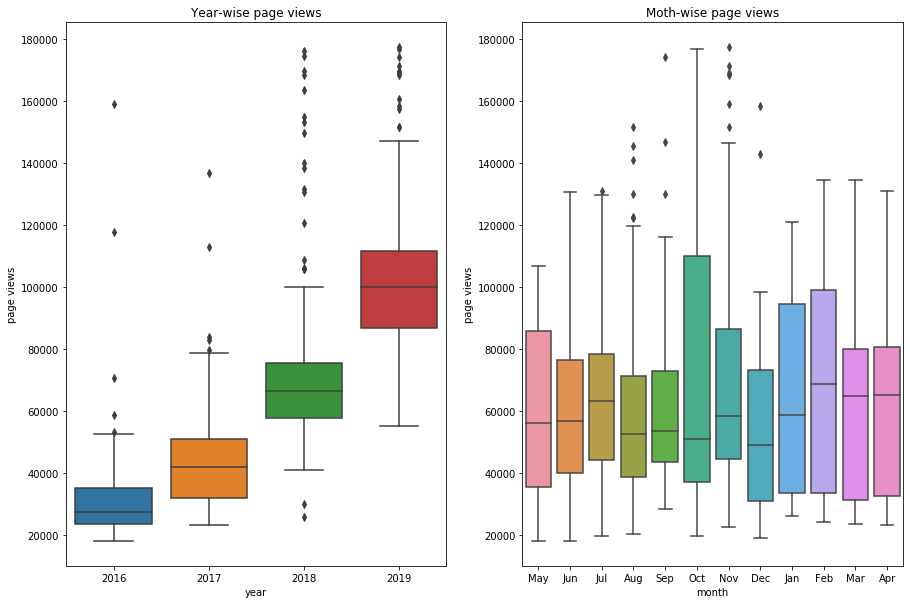

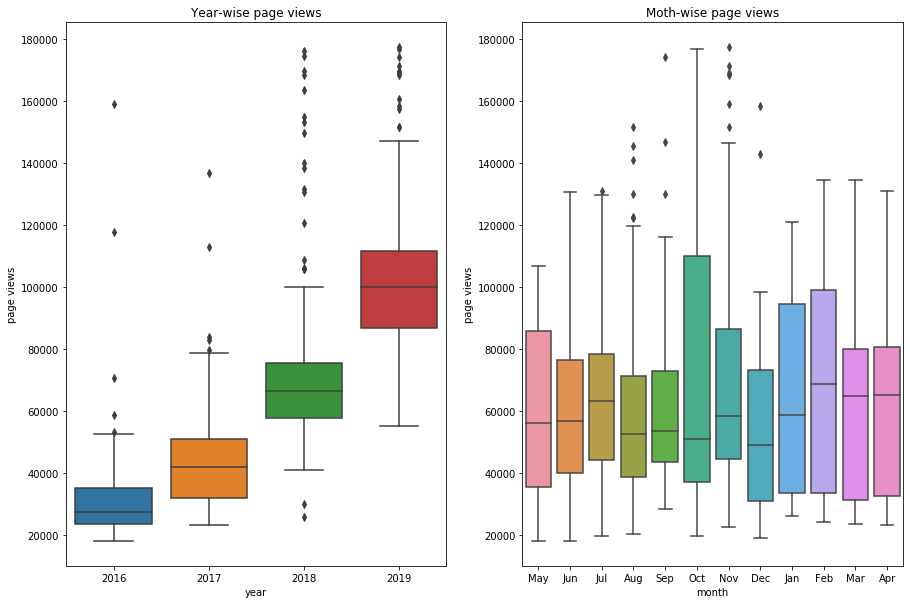

In [9]:
draw_box_plot()